In [1]:
import time
import random
from math import *
import operator
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LinearRegression
#from sklearn import preprocessing, cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
"""
5. Number of Instances: 214
6. Number of Attributes: 10 (including an Id#) plus the class attribute
   -- all attributes are continuously valued
7. Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

9. Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps
"""

'\n5. Number of Instances: 214\n6. Number of Attributes: 10 (including an Id#) plus the class attribute\n   -- all attributes are continuously valued\n7. Attribute Information:\n   1. Id number: 1 to 214\n   2. RI: refractive index\n   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as \n                  are attributes 4-10)\n   4. Mg: Magnesium\n   5. Al: Aluminum\n   6. Si: Silicon\n   7. K: Potassium\n   8. Ca: Calcium\n   9. Ba: Barium\n  10. Fe: Iron\n  11. Type of glass: (class attribute)\n      -- 1 building_windows_float_processed\n      -- 2 building_windows_non_float_processed\n      -- 3 vehicle_windows_float_processed\n      -- 4 vehicle_windows_non_float_processed (none in this database)\n      -- 5 containers\n      -- 6 tableware\n      -- 7 headlamps\n\n9. Class Distribution: (out of 214 total instances)\n    -- 163 Window glass (building windows and vehicle windows)\n       -- 87 float processed  \n          -- 70 building windows\n          --

In [3]:
location = r"C:\Users\Shree\Desktop\datasets\glass.csv"
location

'C:\\Users\\Shree\\Desktop\\datasets\\glass.csv'

In [4]:
# load the training data from glass data set
df_training = pd.read_csv(location)

In [5]:
df_training.head(10)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [6]:
# Question: Pretend that we want to predict ri, and our only feature is al. 
# How could we do it using machine learning?

# Answer: We could frame it as a regression problem, and use a linear 
#         regression model with al as the only feature and ri as the 
#         response.

# Question: How would we visualize this model?

# Answer: Create a scatter plot with al on the x-axis and ri on the y-axis, 
#         and draw the line of best fit.

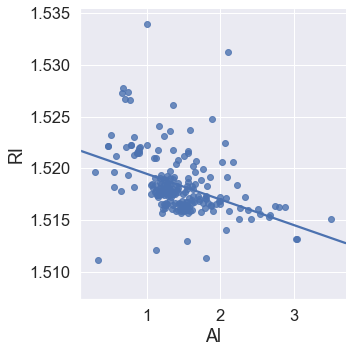

In [7]:
sns.lmplot(x='Al', y='RI', data=df_training, ci=None)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


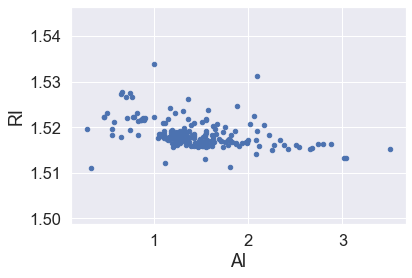

In [8]:
# Question: How would we draw this plot without using Seaborn?

# scatter plot using Pandas
df_training.plot(kind='scatter', x='Al', y='RI')

In [9]:
df_training.Al

0      1.10
1      1.36
2      1.54
3      1.29
4      1.24
       ... 
209    2.88
210    1.99
211    2.02
212    1.94
213    2.08
Name: Al, Length: 214, dtype: float64

In [10]:
# fit a linear regression model
linreg = LinearRegression()

feature_cols = ['Al', 'Si','K']

X = df_training[feature_cols]

y = df_training.RI

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# make predictions for all values of X
df_training['RI_pred'] = linreg.predict(X)

df_training.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,RI_pred
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.521697
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518364
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.517536
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518652
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.517664


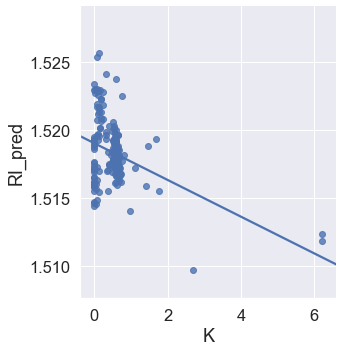

In [12]:
sns.lmplot(x='K', y='RI_pred', data=df_training, ci=None)

In [13]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.68970535, 1.68876574, 1.69065262])

In [14]:
# compute prediction for al=2 using the predict method
linreg.predict([[2,3,4],[1,2,1]])

array([1.67693705, 1.68545268])

In [15]:
linreg.intercept_

1.6934920437923429

In [16]:
linreg.coef_

array([-0.00189335, -0.00236315, -0.00141971])

In [17]:
# Interpretation: A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.
# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.00247761

1.51451251